In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
        
#Scaling and Splitting
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.model_selection import train_test_split

#Modeling
from sklearn.linear_model import LassoLars
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

#Evaluation
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

/kaggle/input/trailer-prices/trailerdata1.csv
/kaggle/input/trailer-prices/trailerdata2.csv


# About this notebook
This notebook aims to predict the price of a product (trailer) for an early stage start-up. The data has been anonymized. Due to the web infrastructure of manufacturers of similar trailers, the data was collected by hand. This project is still on-going and updated regularly. 

## Current Challenges
Currently the challenge is to deal with the small amount of data. There are unfortunately not many data points available in general, but work is underway to fill in vital details to increase the dataset as much as possible. 

In [2]:
#The trailer price data is saved in a csv file and must first be loaded
data = pd.read_csv('/kaggle/input/trailer-prices/trailerdata1.csv', sep=';')
data.head(5)

,total dry weight,length,Cabin exterior width,exterior height,interior height highest point,Usage Intent- On or Off Road,A/C,Roof Rack,Driver Side Window,Driver Side Door,...,Rear Door,Rear Door Window,Spare Tire,Battery Power Supply,Cabinets,Refrigerator,STOVE,USB Charging,Awning,Base price
0,1660,198.0,102.0,84.0,54.0,On Road,Yes,Yes,Yes,No,...,No,No,Yes,Option,Yes,Yes,Yes,Yes,Option,14879
1,1320,144.0,102.0,90.0,54.0,On Road,Yes,Yes,Yes,No,...,No,No,Yes,Option,Yes,Yes,Yes,Yes,Option,12500
2,1320,144.0,102.0,90.0,54.0,On Road,Yes,Yes,Yes,No,...,No,No,Yes,Option,Yes,Yes,Yes,Yes,Option,14997
3,1930,185.0,102.0,105.0,73.0,On Road,Yes,Yes,Yes,No,...,No,No,Yes,Option,Yes,Yes,Yes,Yes,Option,15965
4,2260,188.0,102.0,108.0,74.0,On Road,Yes,Yes,Yes,No,...,No,No,Yes,Option,Yes,Yes,Yes,Yes,No,18689


In [3]:
#inspect the data types of each column
#for modeling everything needs to be and int or float
data.dtypes

total dry weight                   int64
length                           float64
Cabin exterior width             float64
exterior height                  float64
interior height highest point    float64
Usage Intent- On or Off Road      object
A/C                               object
Roof Rack                         object
Driver Side Window                object
Driver Side Door                  object
Driver Side Door Window           object
Passenger Side Door               object
Passenger Side Door Window        object
Passenger Side Window             object
Rear Door                         object
Rear Door Window                  object
Spare Tire                        object
Battery Power Supply              object
Cabinets                          object
Refrigerator                      object
STOVE                             object
USB Charging                      object
Awning                            object
Base price                         int64
dtype: object

In [4]:
#checking for missing values
#missing values must be dealt with for ML modeling
data.isna().sum()

total dry weight                 0
length                           0
Cabin exterior width             0
exterior height                  0
interior height highest point    0
Usage Intent- On or Off Road     0
A/C                              0
Roof Rack                        0
Driver Side Window               0
Driver Side Door                 0
Driver Side Door Window          0
Passenger Side Door              0
Passenger Side Door Window       0
Passenger Side Window            0
Rear Door                        0
Rear Door Window                 0
Spare Tire                       0
Battery Power Supply             0
Cabinets                         0
Refrigerator                     0
STOVE                            0
USB Charging                     0
Awning                           0
Base price                       0
dtype: int64

In [5]:
#drop columns which contain many empty values that are unlikely to be helpful in calculations
#data.drop(['model', 'year', 'sleeps', 'aluminum siding (inch)', 'A/C', 'msrp'], axis=1)

In [6]:
#83 is the target but it will be removed later to prevent problems later
#data2=data.drop(data.index[[83]])

In [7]:
data

,total dry weight,length,Cabin exterior width,exterior height,interior height highest point,Usage Intent- On or Off Road,A/C,Roof Rack,Driver Side Window,Driver Side Door,...,Rear Door,Rear Door Window,Spare Tire,Battery Power Supply,Cabinets,Refrigerator,STOVE,USB Charging,Awning,Base price
0,1660,198.0,102.0,84.0,54.0,On Road,Yes,Yes,Yes,No,...,No,No,Yes,Option,Yes,Yes,Yes,Yes,Option,14879
1,1320,144.0,102.0,90.0,54.0,On Road,Yes,Yes,Yes,No,...,No,No,Yes,Option,Yes,Yes,Yes,Yes,Option,12500
2,1320,144.0,102.0,90.0,54.0,On Road,Yes,Yes,Yes,No,...,No,No,Yes,Option,Yes,Yes,Yes,Yes,Option,14997
3,1930,185.0,102.0,105.0,73.0,On Road,Yes,Yes,Yes,No,...,No,No,Yes,Option,Yes,Yes,Yes,Yes,Option,15965
4,2260,188.0,102.0,108.0,74.0,On Road,Yes,Yes,Yes,No,...,No,No,Yes,Option,Yes,Yes,Yes,Yes,No,18689
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,900,137.0,60.5,67.5,45.0,On Road,Option,Option,Option,Option,...,No,Option,Option,No,No,No,No,No,Option,6700
91,750,137.0,60.5,67.5,45.0,On Road,Option,Option,Option,Option,...,No,Option,Option,No,No,No,No,No,Option,5900
92,1000,137.0,60.5,74.0,45.0,Off Road,Option,Option,Option,Option,...,No,Option,Option,No,No,No,No,No,Option,9900
93,850,144.0,93.0,72.0,47.0,On Road/Off Road,Yes,Yes,No,No,...,Yes,Yes,Option,No,Option,Option,Option,Option,Option,9995


In [8]:
data.isna().sum()

total dry weight                 0
length                           0
Cabin exterior width             0
exterior height                  0
interior height highest point    0
Usage Intent- On or Off Road     0
A/C                              0
Roof Rack                        0
Driver Side Window               0
Driver Side Door                 0
Driver Side Door Window          0
Passenger Side Door              0
Passenger Side Door Window       0
Passenger Side Window            0
Rear Door                        0
Rear Door Window                 0
Spare Tire                       0
Battery Power Supply             0
Cabinets                         0
Refrigerator                     0
STOVE                            0
USB Charging                     0
Awning                           0
Base price                       0
dtype: int64

In [9]:
data.shape

(95, 24)

In [10]:
#data=data.drop(data.index[[78]])

In [11]:
#these columns will be renamed to remove the space in the heading 
data = data.rename(columns={"exterior height": "eheight", "total dry weight": "tdweight", "interior height":"intheight", "exterior width":"ewidth", "Base price":"price"})

In [12]:
#data2['intheight'] = data2['intheight'].fillna(data2['intheight'].mean())
#data2['ewidth'] = data2['ewidth'].fillna(data2['ewidth'].mean())

In [13]:
data.isna().sum()

tdweight                         0
length                           0
Cabin exterior width             0
eheight                          0
interior height highest point    0
Usage Intent- On or Off Road     0
A/C                              0
Roof Rack                        0
Driver Side Window               0
Driver Side Door                 0
Driver Side Door Window          0
Passenger Side Door              0
Passenger Side Door Window       0
Passenger Side Window            0
Rear Door                        0
Rear Door Window                 0
Spare Tire                       0
Battery Power Supply             0
Cabinets                         0
Refrigerator                     0
STOVE                            0
USB Charging                     0
Awning                           0
price                            0
dtype: int64

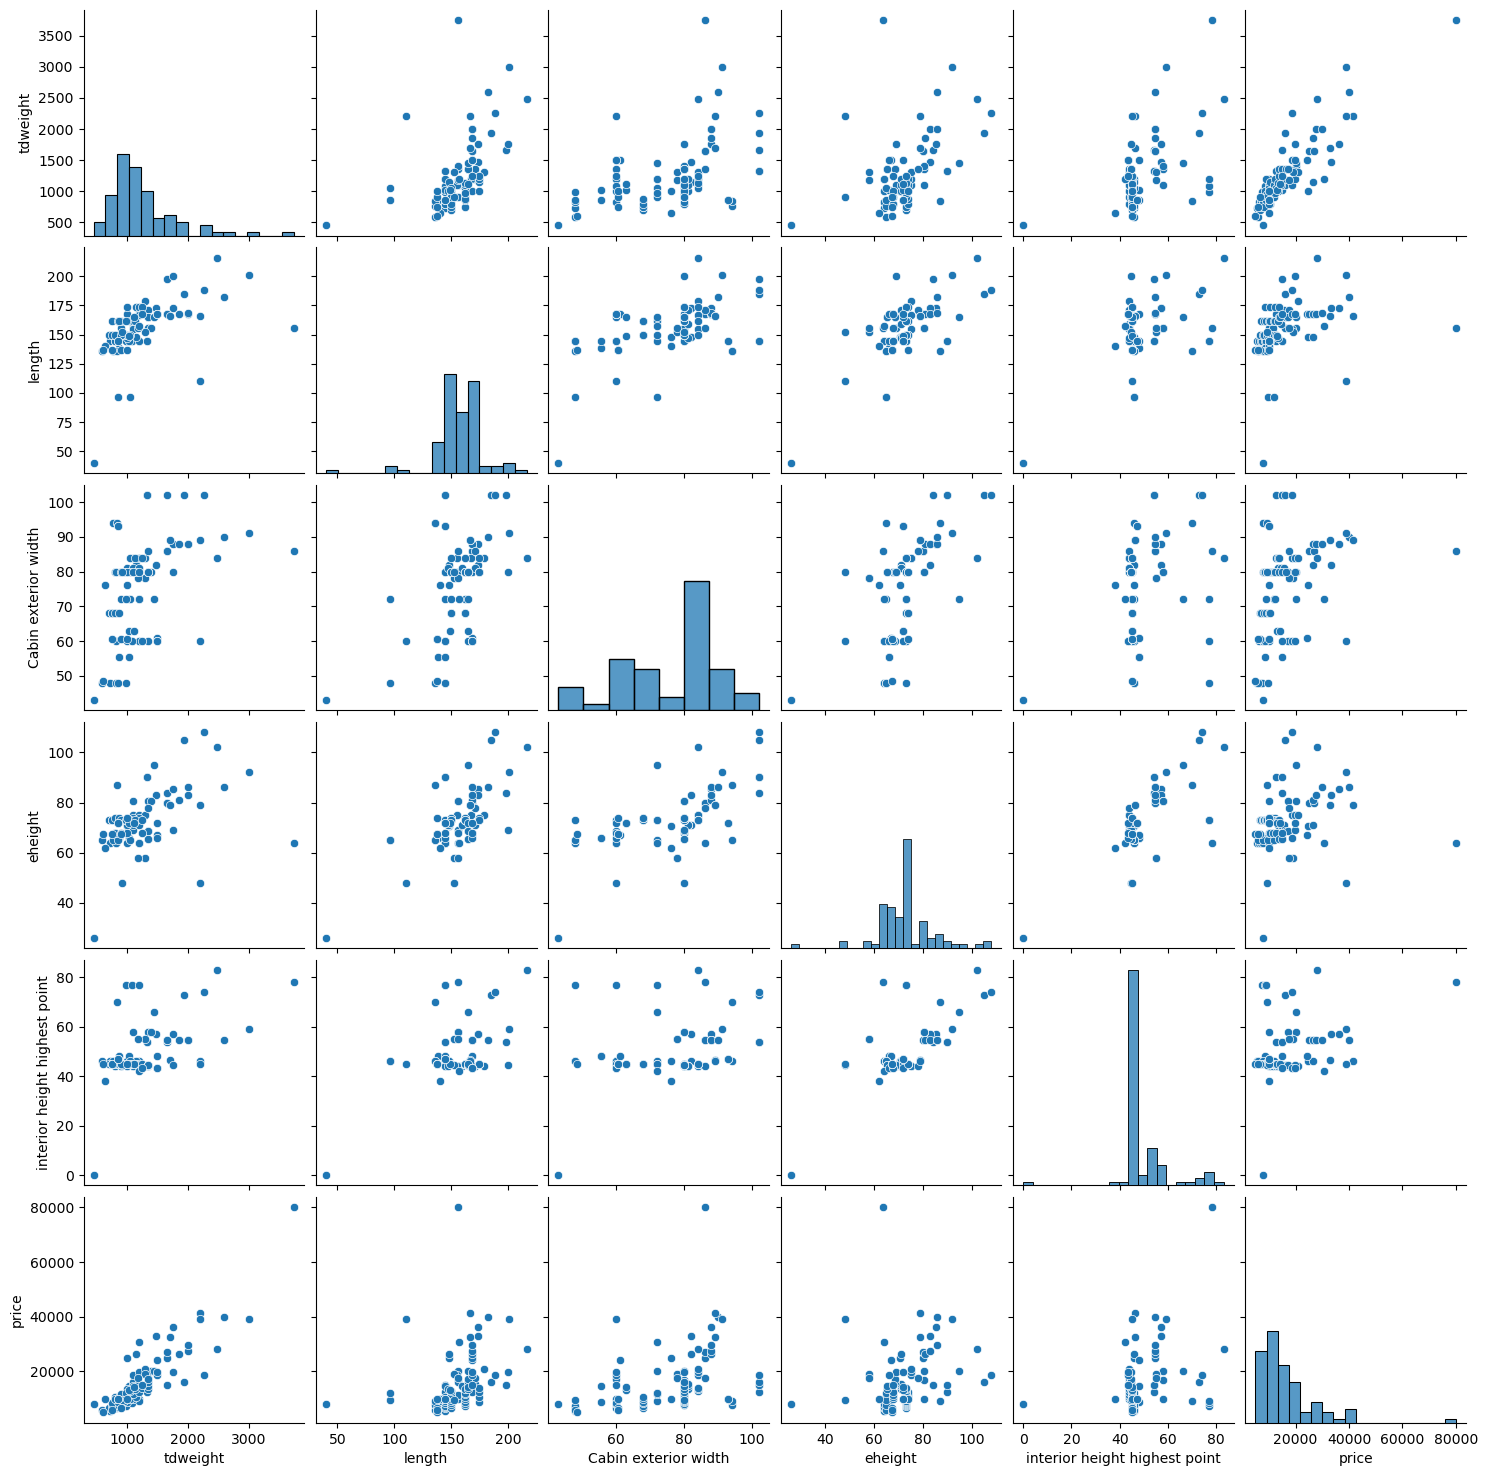

In [14]:
sns.pairplot(data)

Of all the variables, total dry weight appears to be the most correlated with the price. Let's look at it a bit more closely. 

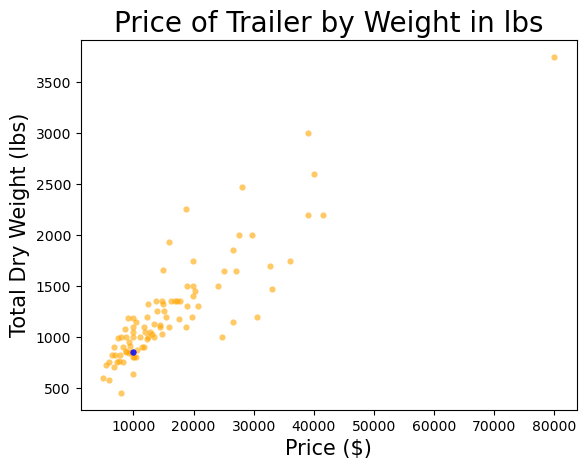

In [15]:
# values of x
x=data['price']
y= data['tdweight']

col = []
  
for i in range(0, len(x)):
    #the target trailer in blue
    if x[i]==9995:
        col.append('blue')  
    #all other trailers in orange
    else:
        col.append('orange') 
  
for i in range(len(x)):
      
    # plotting the corresponding x with y 
    # and respective color
    plt.scatter(x[i], y[i], c = col[i], s = 20,
                linewidth = 0, alpha=0.6)
    plt.title("Price of Trailer by Weight in lbs", fontsize=20)
    plt.ylabel("Total Dry Weight (lbs)", fontsize=15)
    plt.xlabel("Price ($)", fontsize=15)
      
plt.show()

Now let's look at how a few features map onto the weight vs. price

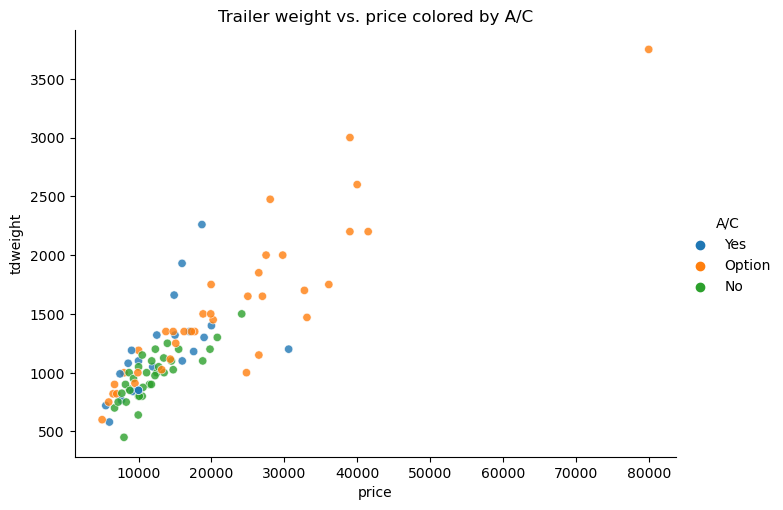

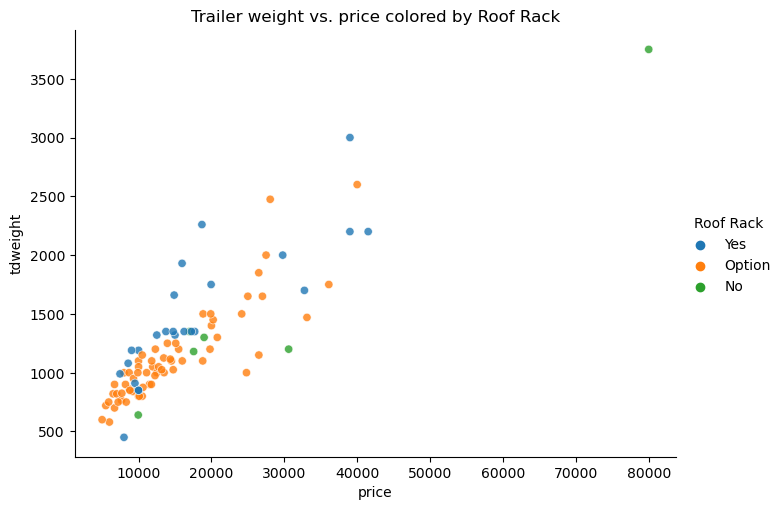

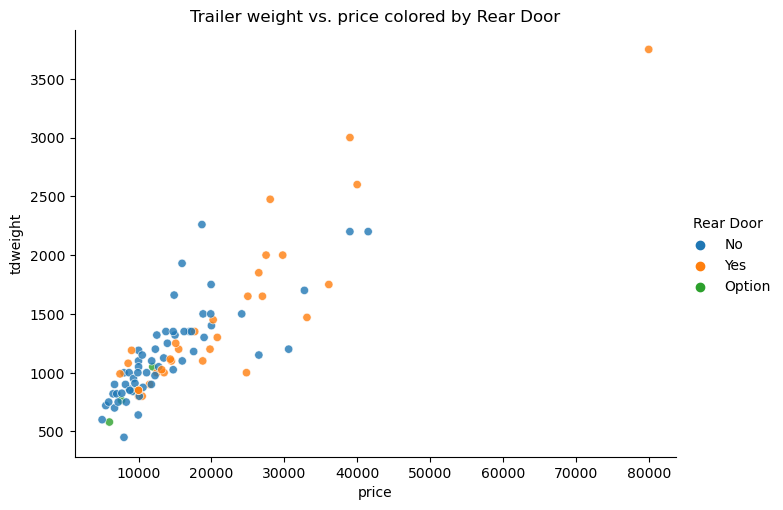

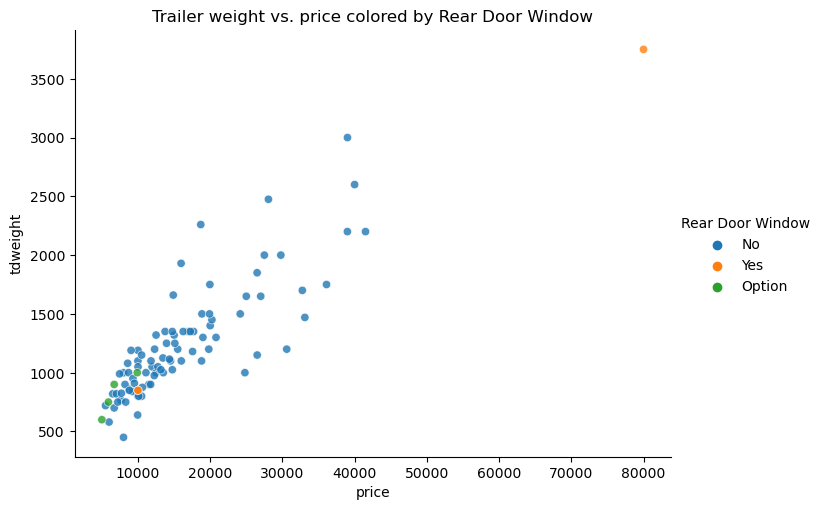

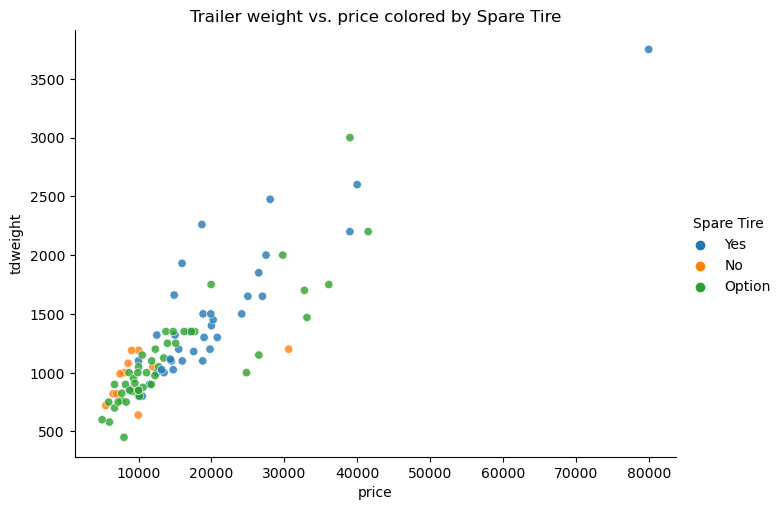

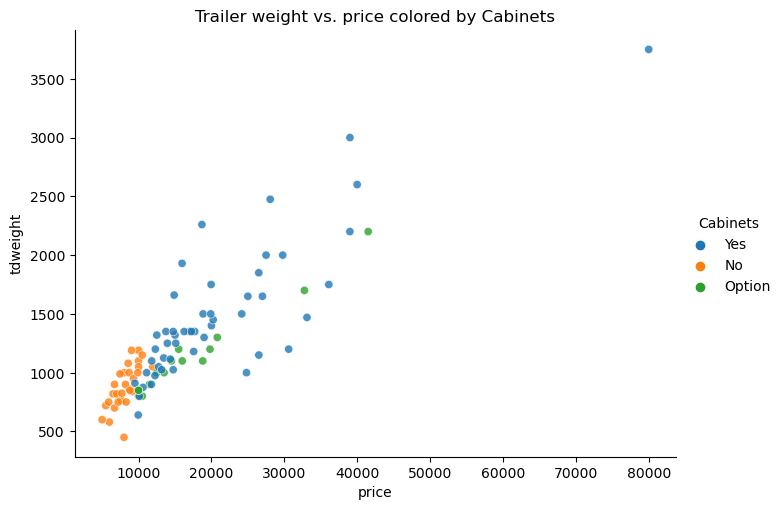

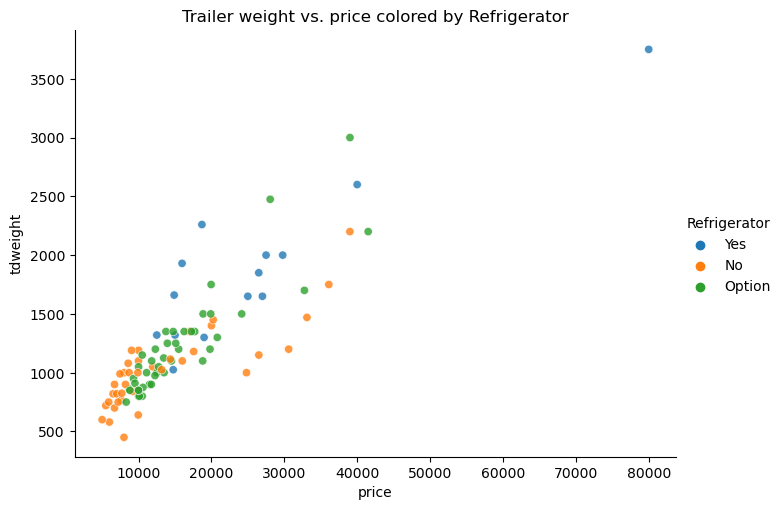

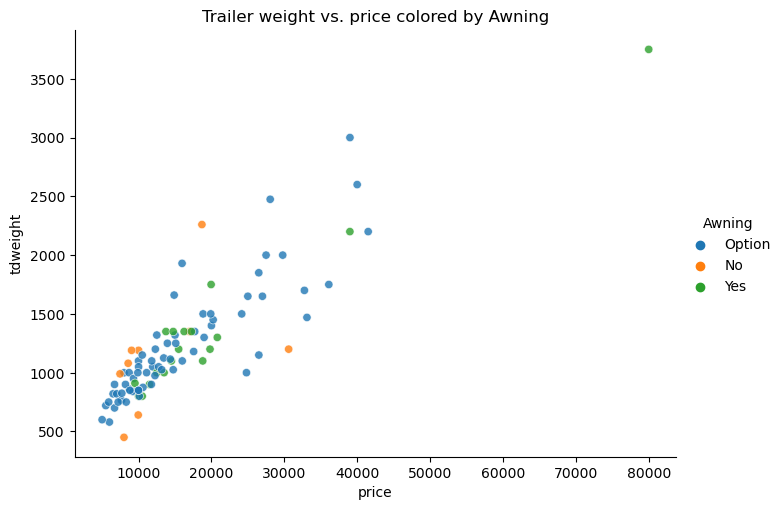

In [16]:
for c in ['A/C', 'Roof Rack', 'Rear Door', 'Rear Door Window', 'Spare Tire', 'Cabinets', 'Refrigerator', 'Awning']:
    sns.relplot(data=data, x='price', y='tdweight', hue=f"{c}", aspect=1.4, alpha=0.8)
    plt.title(f'Trailer weight vs. price colored by {c.title()}')
    plt.show()

In [17]:
#select the categorical data for encoding
cat_data = data.iloc[:, 5:23]
cat_data

,Usage Intent- On or Off Road,A/C,Roof Rack,Driver Side Window,Driver Side Door,Driver Side Door Window,Passenger Side Door,Passenger Side Door Window,Passenger Side Window,Rear Door,Rear Door Window,Spare Tire,Battery Power Supply,Cabinets,Refrigerator,STOVE,USB Charging,Awning
0,On Road,Yes,Yes,Yes,No,No,Yes,Yes,Yes,No,No,Yes,Option,Yes,Yes,Yes,Yes,Option
1,On Road,Yes,Yes,Yes,No,No,Yes,Yes,Yes,No,No,Yes,Option,Yes,Yes,Yes,Yes,Option
2,On Road,Yes,Yes,Yes,No,No,Yes,Yes,Yes,No,No,Yes,Option,Yes,Yes,Yes,Yes,Option
3,On Road,Yes,Yes,Yes,No,No,Yes,Yes,Yes,No,No,Yes,Option,Yes,Yes,Yes,Yes,Option
4,On Road,Yes,Yes,Yes,No,No,Yes,Yes,Yes,No,No,Yes,Option,Yes,Yes,Yes,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,On Road,Option,Option,Option,Option,Base,Base,Base,Base,No,Option,Option,No,No,No,No,No,Option
91,On Road,Option,Option,Option,Option,Base,Base,Base,Base,No,Option,Option,No,No,No,No,No,Option
92,Off Road,Option,Option,Option,Option,Base,Base,Base,Base,No,Option,Option,No,No,No,No,No,Option
93,On Road/Off Road,Yes,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Option,No,Option,Option,Option,Option,Option


In [18]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()

#label encode the data to prepare for modeling
#label encoding is preferred for categorical variables

for col in cat_data:
    data[col] = labelencoder.fit_transform(data[col])
 
data.head()

,tdweight,length,Cabin exterior width,eheight,interior height highest point,Usage Intent- On or Off Road,A/C,Roof Rack,Driver Side Window,Driver Side Door,...,Rear Door,Rear Door Window,Spare Tire,Battery Power Supply,Cabinets,Refrigerator,STOVE,USB Charging,Awning,price
0,1660,198.0,102.0,84.0,54.0,1,2,2,2,0,...,0,0,2,2,2,2,2,2,1,14879
1,1320,144.0,102.0,90.0,54.0,1,2,2,2,0,...,0,0,2,2,2,2,2,2,1,12500
2,1320,144.0,102.0,90.0,54.0,1,2,2,2,0,...,0,0,2,2,2,2,2,2,1,14997
3,1930,185.0,102.0,105.0,73.0,1,2,2,2,0,...,0,0,2,2,2,2,2,2,1,15965
4,2260,188.0,102.0,108.0,74.0,1,2,2,2,0,...,0,0,2,2,2,2,2,2,0,18689


In [19]:
#make a copy of the data for later
data2=data

In [20]:
corr=data2.corr()
corr

,tdweight,length,Cabin exterior width,eheight,interior height highest point,Usage Intent- On or Off Road,A/C,Roof Rack,Driver Side Window,Driver Side Door,...,Rear Door,Rear Door Window,Spare Tire,Battery Power Supply,Cabinets,Refrigerator,STOVE,USB Charging,Awning,price
tdweight,1.000000,0.516802,0.439334,0.444804,0.519671,-0.231228,0.198973,0.146197,0.091990,0.051279,...,0.265771,0.088466,0.356826,0.489057,0.511848,0.492858,0.634529,0.245941,0.110642,0.878719
length,0.516802,1.000000,0.507395,0.648981,0.429302,-0.031175,-0.081507,0.033744,0.044849,0.220214,...,0.158165,-0.146149,0.320744,0.378197,0.456790,0.429615,0.317479,0.464553,0.191062,0.322805
Cabin exterior width,0.439334,0.507395,1.000000,0.596930,0.312979,0.203580,0.105822,0.157891,-0.006237,-0.126122,...,0.187451,0.032504,0.391917,0.283354,0.406841,0.528074,0.329957,0.472345,0.184672,0.343420
eheight,0.444804,0.648981,0.596930,1.000000,0.654836,0.010150,0.190129,0.146478,0.237324,-0.108771,...,0.217892,-0.086496,0.285470,0.162735,0.265539,0.361989,0.234081,0.315345,-0.131181,0.212419
interior height highest point,0.519671,0.429302,0.312979,0.654836,1.000000,-0.009611,0.479386,0.055727,0.327428,-0.055347,...,0.282002,0.078880,0.116315,-0.013610,0.133871,0.169403,0.288585,-0.021442,-0.193076,0.326899
Usage Intent- On or Off Road,-0.231228,-0.031175,0.203580,0.010150,-0.009611,1.000000,0.206389,-0.094895,0.000850,-0.258380,...,-0.171197,0.267638,0.044543,-0.241911,-0.226606,0.051080,0.114219,-0.085112,-0.101745,-0.270139
A/C,0.198973,-0.081507,0.105822,0.190129,0.479386,0.206389,1.000000,0.213491,0.164919,-0.404807,...,0.037745,0.181134,-0.098919,-0.165856,0.023328,-0.118410,0.369424,-0.144673,-0.334711,0.099880
Roof Rack,0.146197,0.033744,0.157891,0.146478,0.055727,-0.094895,0.213491,1.000000,-0.211445,-0.068569,...,0.023705,0.005280,-0.141040,0.097215,0.004690,0.187340,0.266030,0.082327,0.049104,-0.066110
Driver Side Window,0.091990,0.044849,-0.006237,0.237324,0.327428,0.000850,0.164919,-0.211445,1.000000,-0.115330,...,-0.055478,-0.134577,-0.031066,-0.050737,-0.005977,0.203687,-0.063029,-0.020990,-0.375122,-0.062746
Driver Side Door,0.051279,0.220214,-0.126122,-0.108771,-0.055347,-0.258380,-0.404807,-0.068569,-0.115330,1.000000,...,-0.102800,-0.340778,-0.290010,0.087573,0.108099,0.025588,-0.054202,-0.015910,-0.022085,0.081744


<AxesSubplot:>

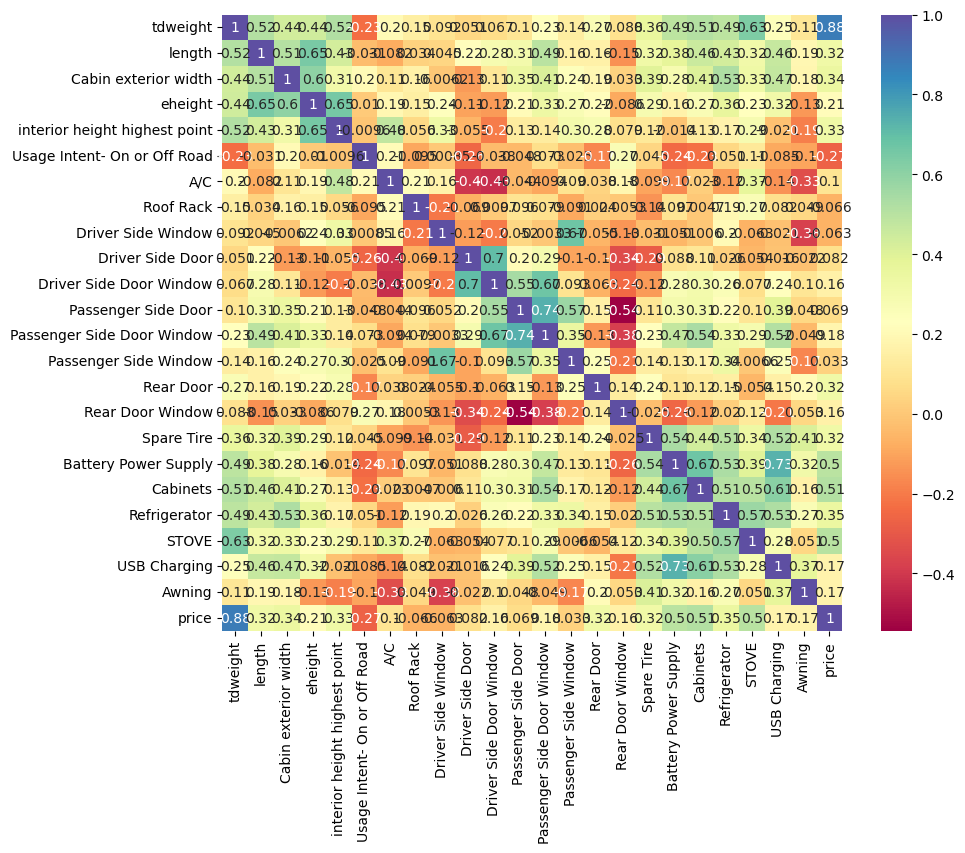

In [21]:
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True,cmap="Spectral")

# Machine Learning Modeling
The data is now clean and we can move forward with creating some machine learning models. Once we settle on the best model it can be used to predict the target price of the trailer in question.

#Replace "option" with "no" and try modeling again

In [22]:
data2=data2.drop(data.index[93:])

In [23]:
#here the data is split up into X,y where X contains everything but price and y contains what we want to predict (price)
#price is what we want to predict
X = data2.drop(['price'],axis=1)
y=data2['price']

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=1)

In [25]:
#scaling the data
#this usually helps with modeling
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
#function which runs different ML models and prints R^2, MAE and RMSE
def run_experiment(model):
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print("R^2 : ", r2_score(y_test, y_pred))
    print("MAE :", mean_absolute_error(y_test,y_pred))
    print("RMSE:",np.sqrt(mean_squared_error(y_test, y_pred)))
    #EVALUATION OF THE MODEL
    # Plotting y_test and y_pred to understand the spread.
    fig = plt.figure()
    plt.scatter(y_test,y_pred)
    fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
    plt.xlabel('y_test', fontsize=18)                          # X-label
    plt.ylabel('y_pred', fontsize=16) 

Now the data is all cleaned up and ready for creating some machine learning models. A funtion has been written to run various models and output metrics 

R^2 :  0.8175460579832852
MAE : 3219.6147883533054
RMSE: 3801.7989273838048


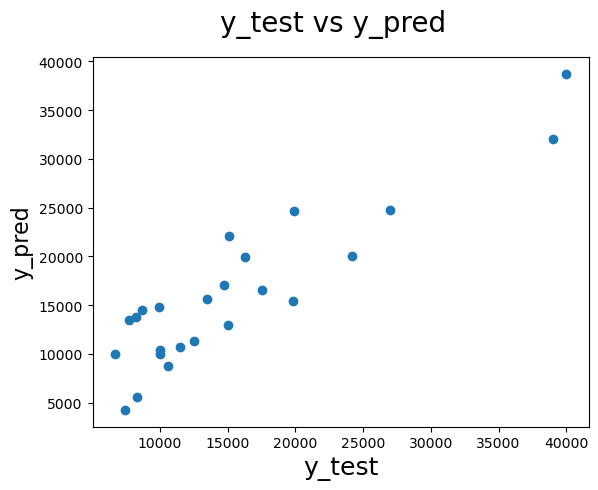

In [27]:
model_1 = LinearRegression()
run_experiment(model_1)

R^2 :  0.6284342798590264
MAE : 2915.5416666666665
RMSE: 5425.382202358343


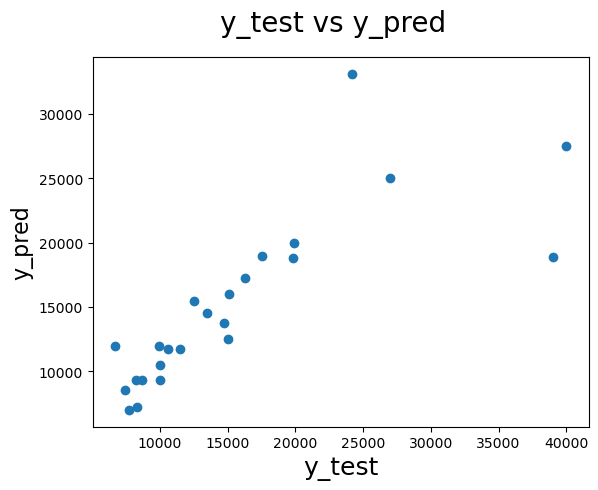

In [28]:
model_2 = DecisionTreeRegressor(random_state = 1)
run_experiment(model_2)

R^2 :  0.5949808011073989
MAE : 4744.793518806979
RMSE: 5664.353168561871


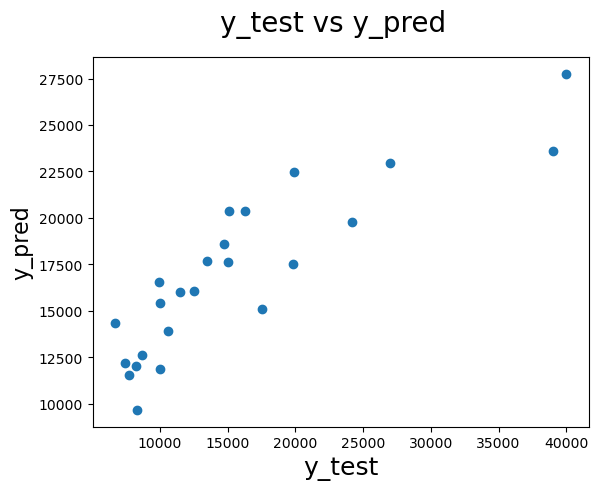

In [29]:
model_3 = Ridge(alpha=100, solver='cholesky', tol=0.0001, random_state=1)
run_experiment(model_3)

R^2 :  0.8088135272613568
MAE : 2910.2308009860208
RMSE: 3891.7156313759274


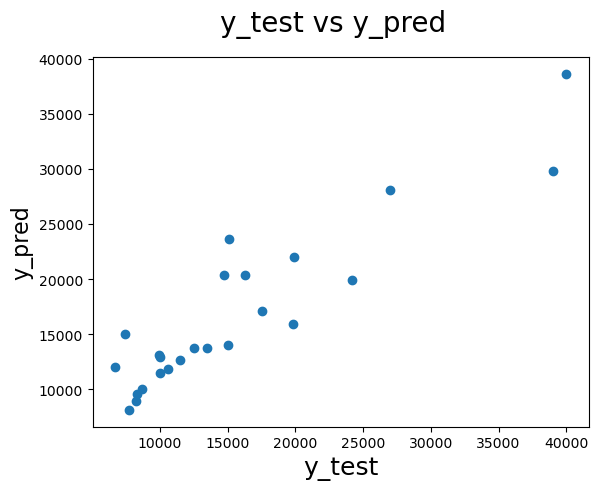

In [30]:
model_4 = Lasso(alpha=0.1, precompute=True, positive=True, selection='random', random_state=1)
run_experiment(model_4)

R^2 :  0.8211458878414297
MAE : 3199.435293545117
RMSE: 3764.107198113552


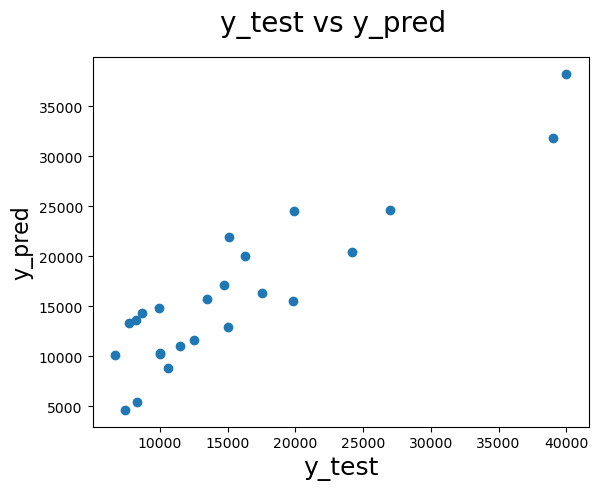

In [31]:
model_5 = ElasticNet(alpha=0.1, l1_ratio=0.9, selection='random', random_state=1)
run_experiment(model_5)

R^2 :  0.8180295205624915
MAE : 3214.9783511176624
RMSE: 3796.7586232332283


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_base.py:138: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,


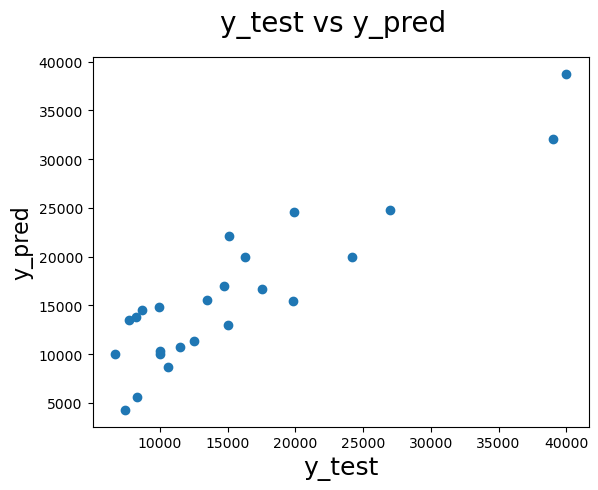

In [32]:
model_6 = LassoLars(alpha=.1)
run_experiment(model_6)

R^2 :  0.822867260119819
MAE : 3179.606880272657
RMSE: 3745.949674591318


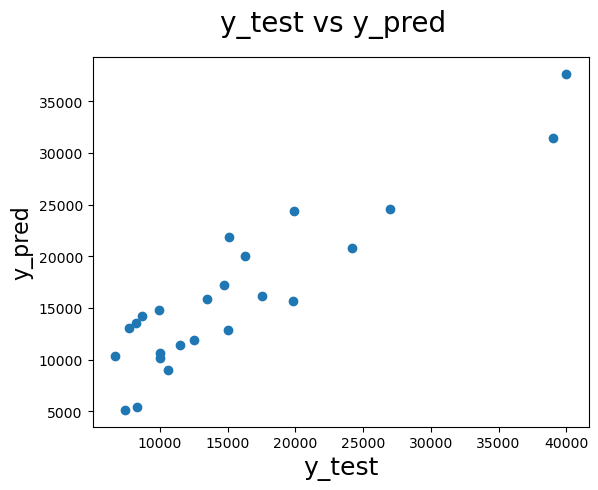

In [33]:
model_7 = BayesianRidge()
run_experiment(model_7)

R^2 :  0.8232654144324485
MAE : 3200.632922687313
RMSE: 3741.737282569276


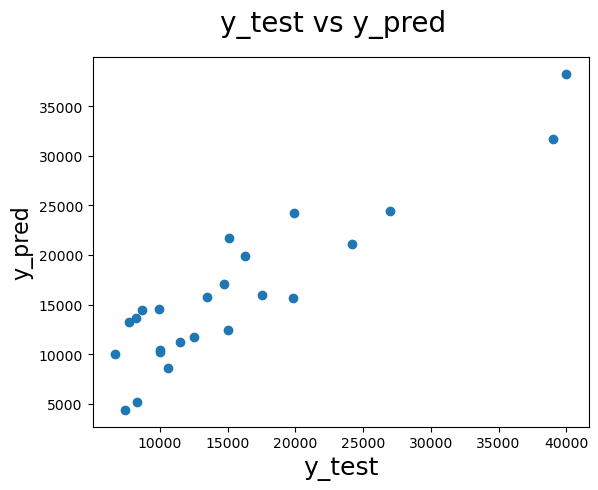

In [34]:
model_8 = SGDRegressor(max_iter=1000, tol=1e-3)
run_experiment(model_8)

R^2 :  -0.05577133143208335
MAE : 6265.009946213751
RMSE: 9145.289350454908


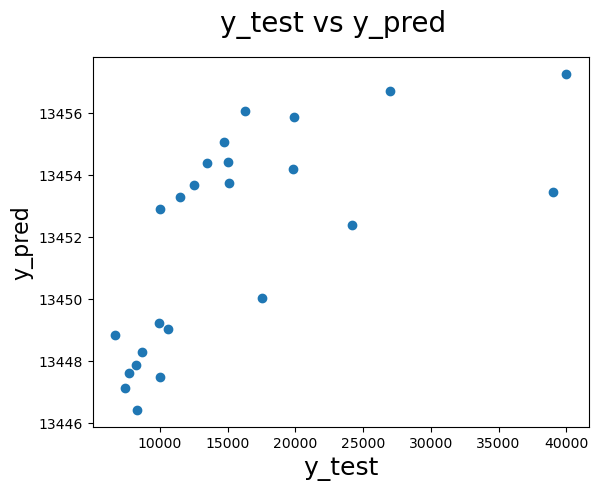

In [35]:
model_9 = SVR(epsilon=0.2)
run_experiment(model_9)

R^2 :  0.880009310340081
MAE : 2280.779037334194
RMSE: 3083.0906422243


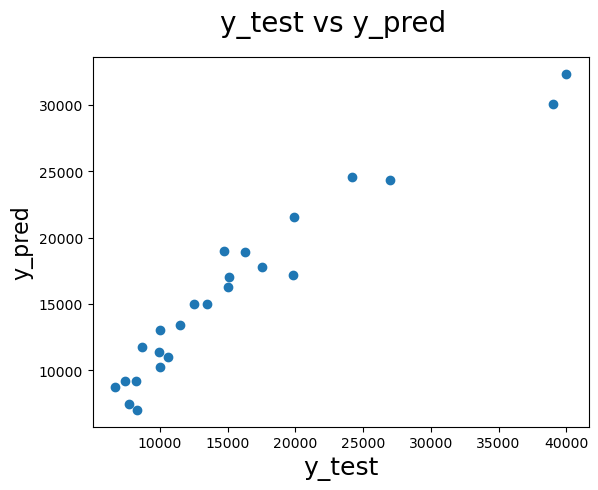

In [36]:
model_10 = RandomForestRegressor(n_estimators=100, min_samples_leaf=3, random_state=1)
run_experiment(model_10)

Unsurprisingly, RandomForest preformed better than all the other models tested. Therefore we will move forward with tuning hyperparameters to figure out which produce the best result.

# Checking Feature Importance

The features which have been included thus far are based on features that have enough data available online to realistically include, and picking out which ones are actually important is still in progress. Currently, a more novel feature information (e.g. solar panels) are being mined, while others whihc are already included need to be optimized. One feature which is currently in process of engineering is the number of doors and if they include windows. the information is currently held in 4 seperate columns which have low correlation to the price, and should be combined into a single column containing all of the information to improve calculations. 

In [37]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = data2.drop(['price'],axis=1)
y=data2['price']
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
#naming the columns
featureScores.columns = ['Specs','Score']  
print(featureScores.nlargest(20,'Score'))  

                            Specs         Score
0                        tdweight  20781.703203
1                          length    291.157633
2            Cabin exterior width    223.285465
4   interior height highest point    216.978445
3                         eheight    156.779086
14                      Rear Door    113.281250
15               Rear Door Window    110.250000
20                          STOVE    107.464286
17           Battery Power Supply     64.857143
18                       Cabinets     61.889381
6                             A/C     61.677215
19                   Refrigerator     60.391304
8              Driver Side Window     57.698347
21                   USB Charging     55.150000
5    Usage Intent- On or Off Road     47.978723
9                Driver Side Door     38.375000
10        Driver Side Door Window     34.112981
16                     Spare Tire     31.351695
22                         Awning     21.544118
12     Passenger Side Door Window     21

[0.19716267 0.13486376 0.11261193 0.09933735 0.05101787 0.04603857
 0.02466008 0.02723053 0.02135416 0.02449807 0.01760416 0.00831463
 0.01530722 0.0225245  0.02341271 0.0037238  0.02587032 0.02854364
 0.02509802 0.02443063 0.02052642 0.02034184 0.02552714]


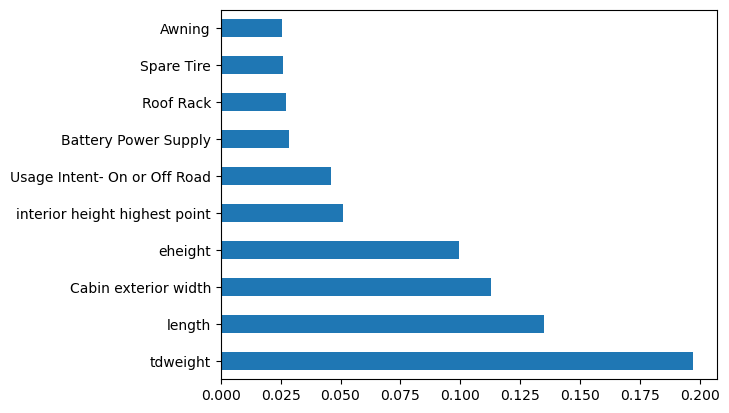

In [38]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

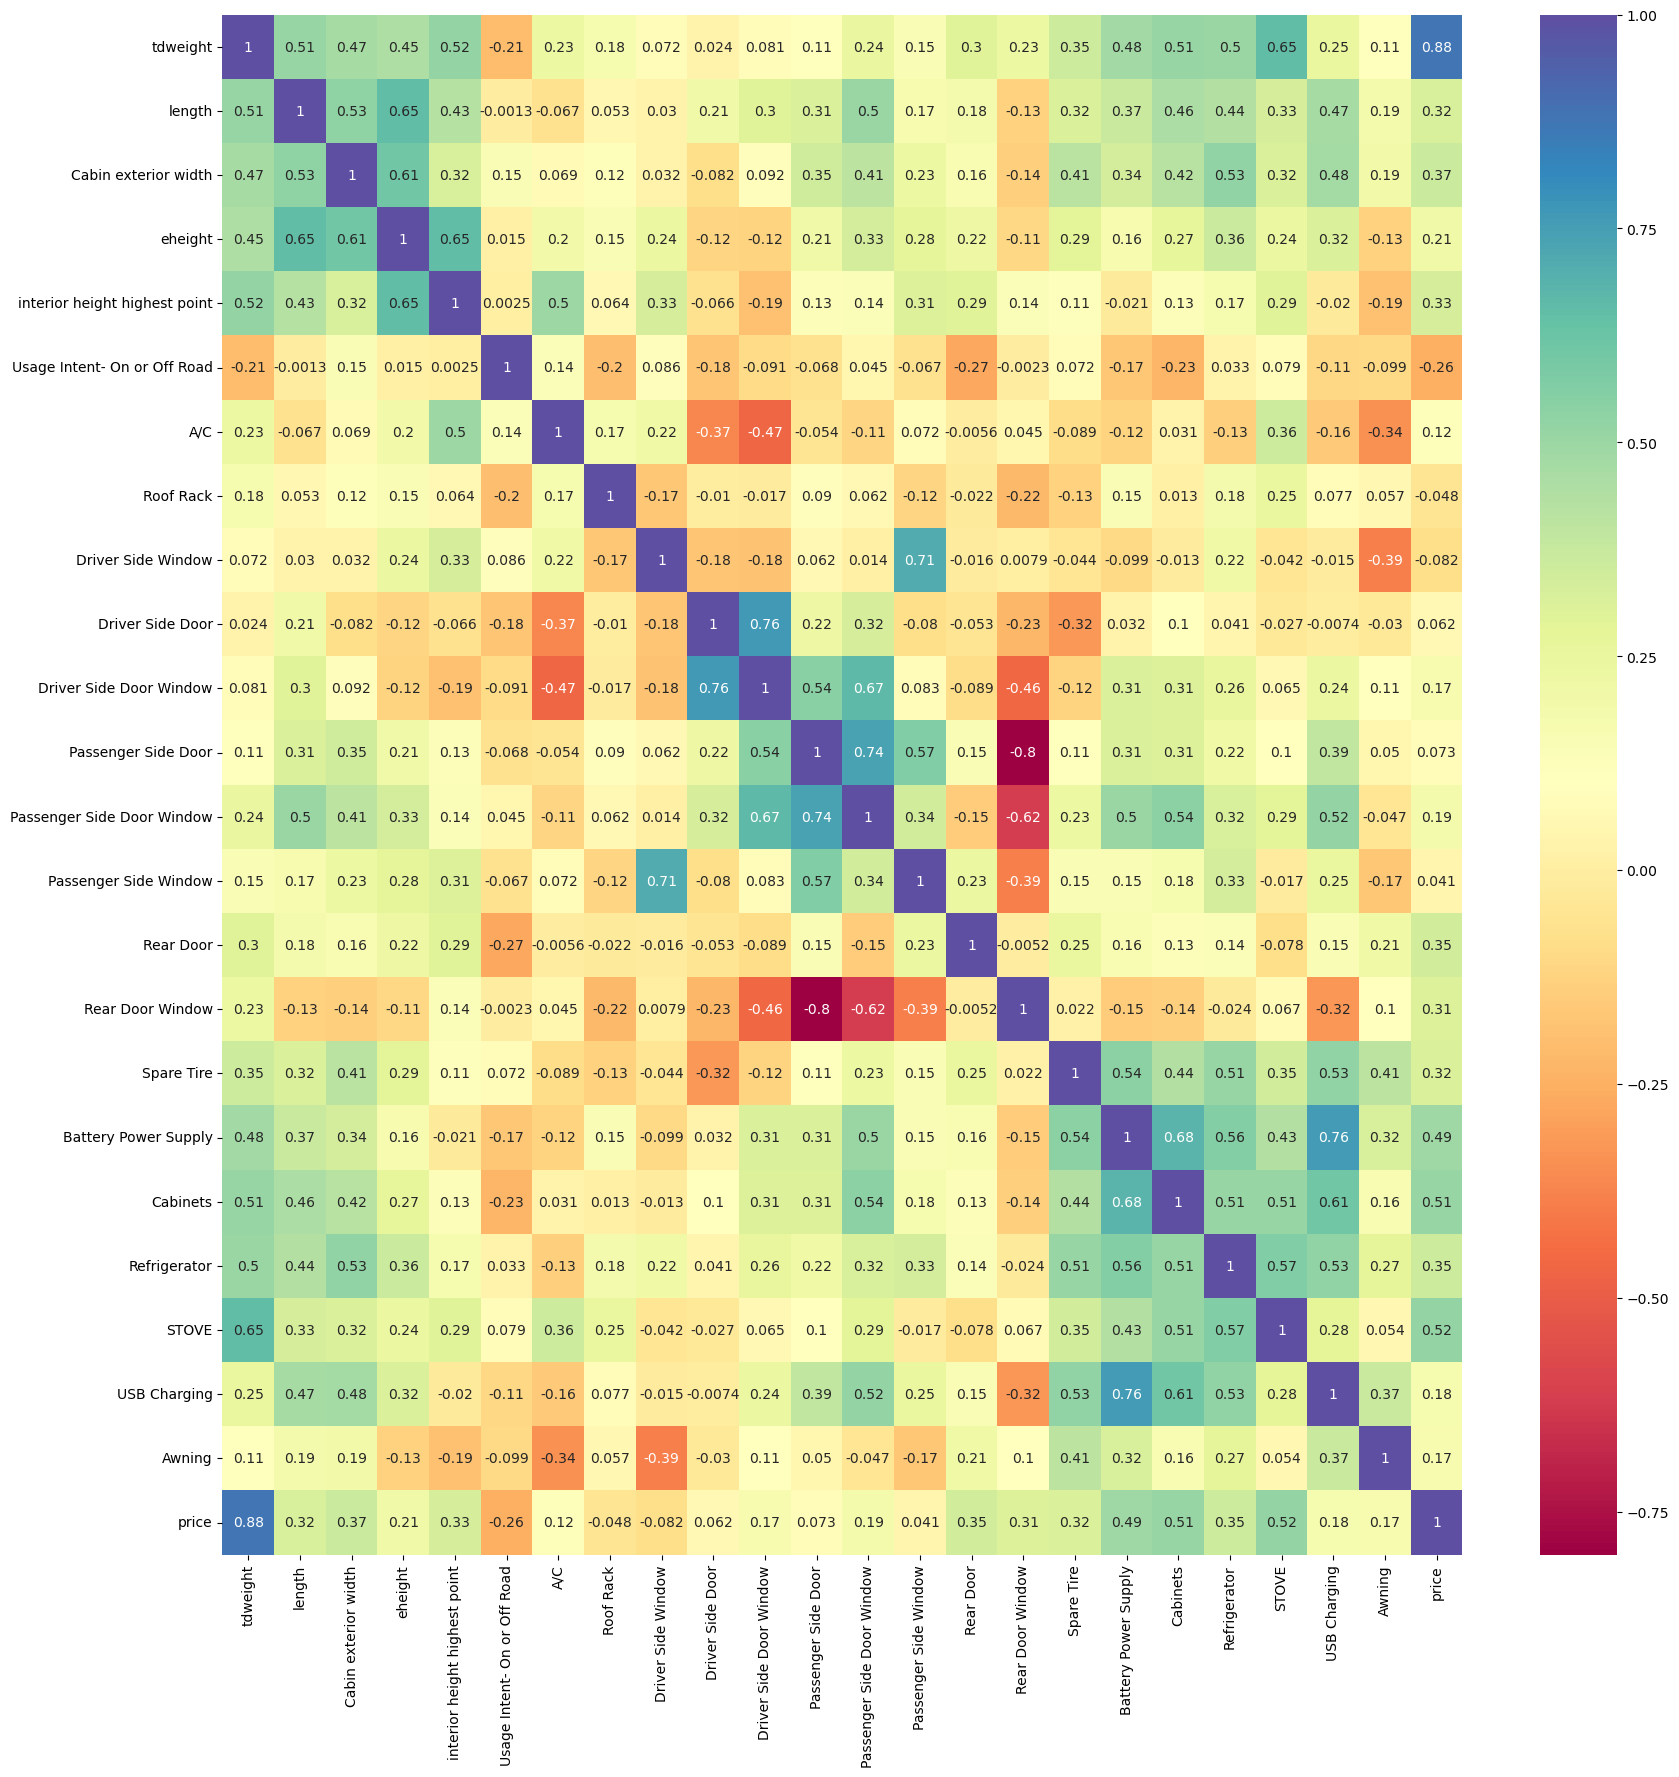

In [39]:
#get correlations of each features in dataset
corrmat = data2.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data2[top_corr_features].corr(),annot=True,cmap="Spectral")

# Feature Engineering
This section is in progress while more feature data is collected.

In [40]:
data3=data.drop(data.index[[90]])

In [41]:
#removing everything with a negative correlation
X = data3.drop(['price', 'Roof Rack', 'Driver Side Window', 'Driver Side Door', 'Passenger Side Door', 'Passenger Side Window', 'Rear Door'],axis=1)
y=data3['price']

In [42]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=1)

In [43]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [44]:
def run_experiment(model):
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print("R^2 : ", r2_score(y_test, y_pred))
    print("MAE :", mean_absolute_error(y_test,y_pred))
    print("RMSE:",np.sqrt(mean_squared_error(y_test, y_pred)))
    #EVALUATION OF THE MODEL
    # Plotting y_test and y_pred to understand the spread.
    fig = plt.figure()
    plt.scatter(y_test,y_pred)
    fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
    plt.xlabel('y_test', fontsize=18)                          # X-label
    plt.ylabel('y_pred', fontsize=16) 

R^2 :  0.6602429143943055
MAE : 4431.4350988418
RMSE: 8658.235339127064


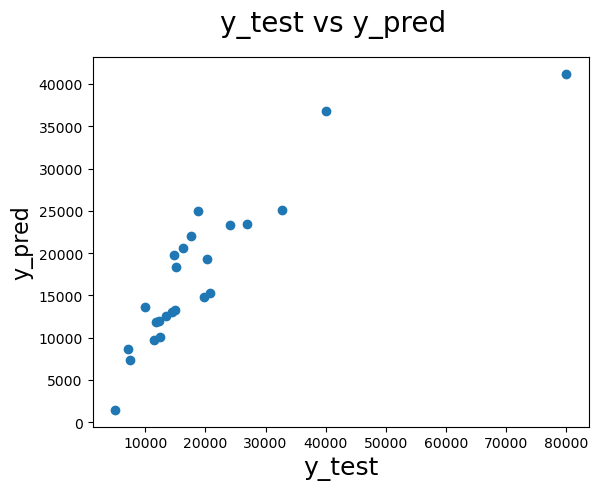

In [45]:
model_1 = LinearRegression()
run_experiment(model_1)

R^2 :  0.5559724828965165
MAE : 4767.5
RMSE: 9898.05966254666


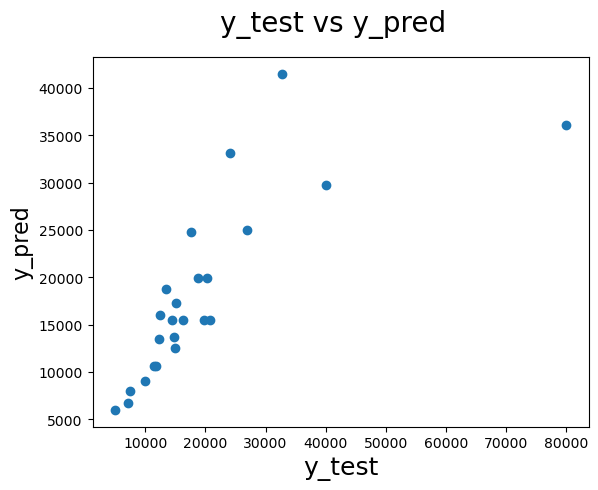

In [46]:
model_2 = DecisionTreeRegressor(random_state = 1)
run_experiment(model_2)

R^2 :  0.36062742618957344
MAE : 6034.971173680715
RMSE: 11877.420340499715


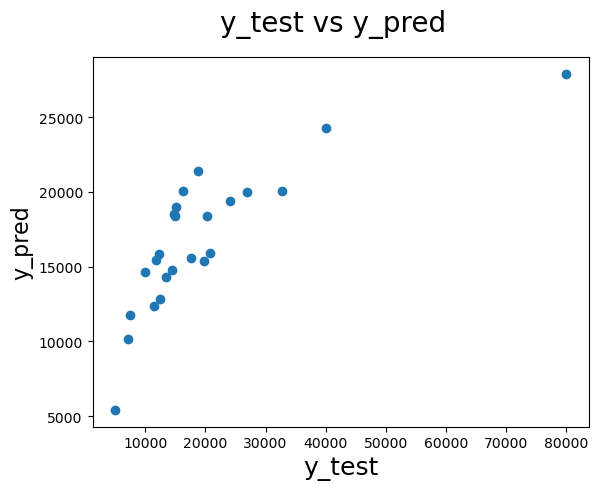

In [47]:
model_3 = Ridge(alpha=100, solver='cholesky', tol=0.0001, random_state=1)
run_experiment(model_3)

R^2 :  0.7068503930902664
MAE : 4631.717119028753
RMSE: 8042.476173151163


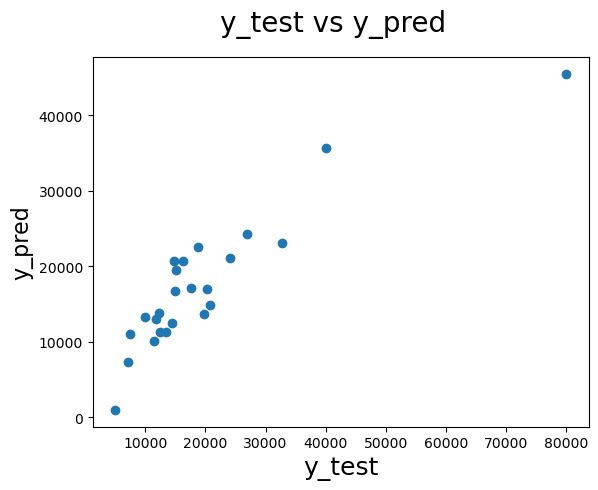

In [48]:
model_4 = Lasso(alpha=0.1, precompute=True, positive=True, selection='random', random_state=1)
run_experiment(model_4)

R^2 :  0.6755442573794412
MAE : 4414.28647635531
RMSE: 8461.022646356827


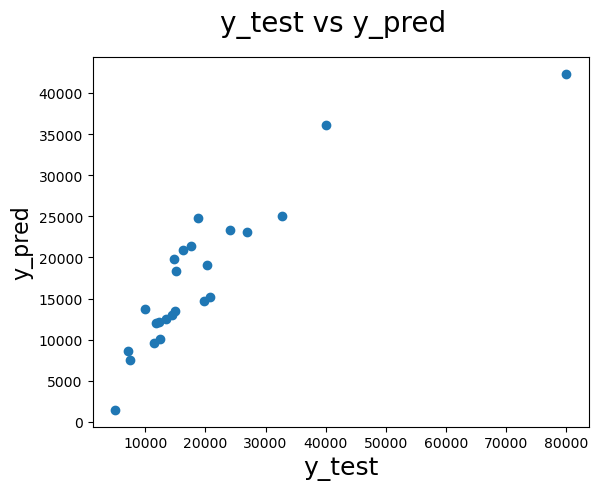

In [49]:
model_5 = ElasticNet(alpha=0.1, l1_ratio=0.9, selection='random', random_state=1)
run_experiment(model_5)

R^2 :  0.6875507580152659
MAE : 4433.9554625893215
RMSE: 8302.996646848478


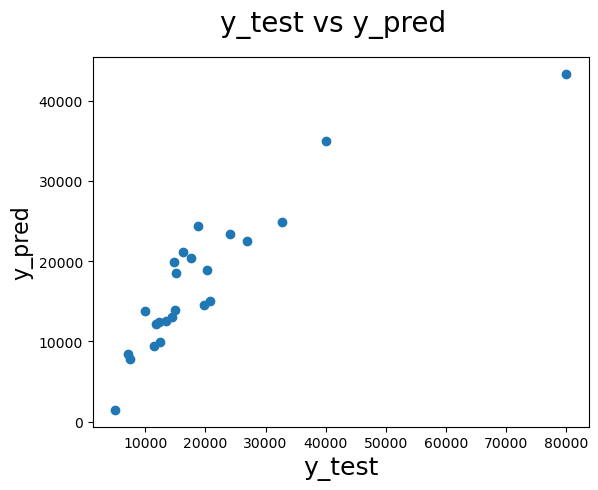

In [50]:
model_7 = BayesianRidge()
run_experiment(model_7)

R^2 :  0.7141869130873231
MAE : 4297.485713030598
RMSE: 7941.200844749909


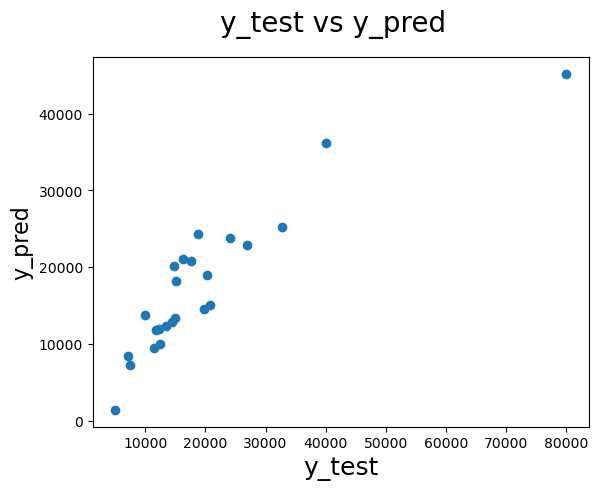

In [51]:
model_8 = SGDRegressor(max_iter=1000, tol=1e-3)
run_experiment(model_8)

R^2 :  -0.24582124061938848
MAE : 9020.329620983006
RMSE: 16579.559604335005


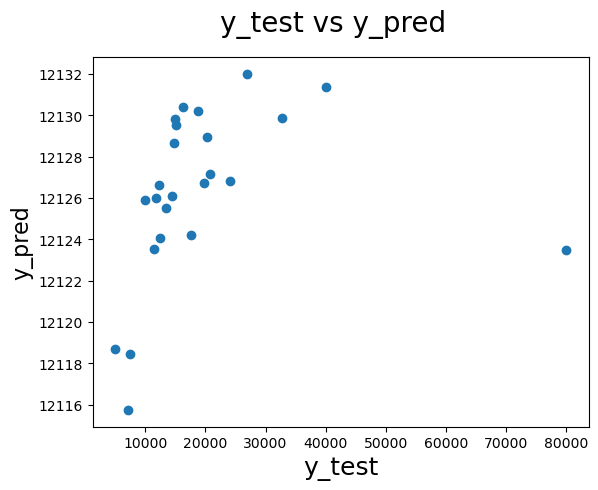

In [52]:
model_9 = SVR(epsilon=0.2)
run_experiment(model_9)

R^2 :  0.49341581634170917
MAE : 4555.039046777296
RMSE: 10572.335537094348


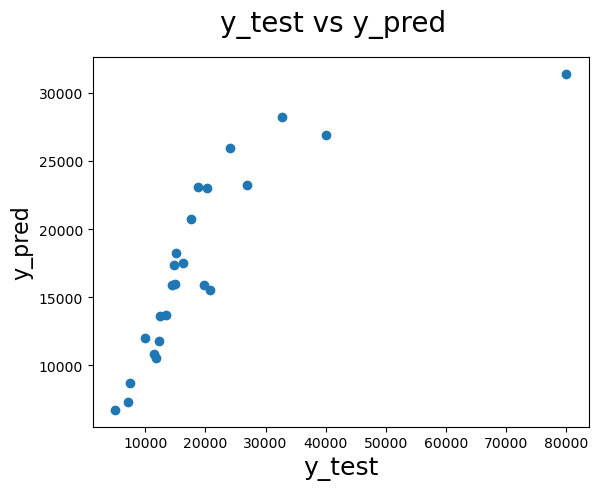

In [53]:
model_10 = RandomForestRegressor(n_estimators=100, min_samples_leaf=3, random_state=1)
run_experiment(model_10)

[0.20826298 0.14238043 0.1349553  0.11045864 0.05760168 0.05074566
 0.03365048 0.02583365 0.02231087 0.01465344 0.02947199 0.03352532
 0.02594581 0.03137421 0.02260973 0.02500826 0.03121156]


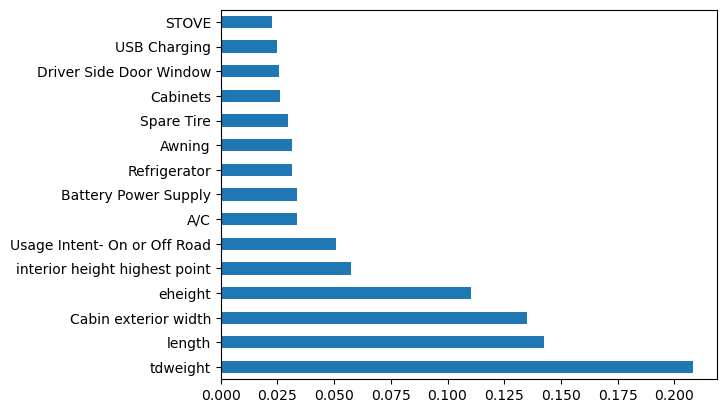

In [54]:
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances 
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

## Hyperparameter Tuning
Perhaps it is a bit early to get into hyperparameter tuning, but nonetheless the code is ready for once the dataset has been expanded :) Commented out for time saving purposes.

In [55]:
rfc=RandomForestRegressor(random_state=1)

In [56]:
param_grid = { 
    'n_estimators': [100, 500, 1000, 5000],
    'max_features': ['auto', 'sqrt', 'log2'],
    #to save time in updating the notebook, max_depth is also left out
     'max_depth' : [5, 10, 15],
    # 'min_samples_leaf' : [1,2,3,5],
     #'criterion' :['squared_error', 'absolute_error', 'friedman_mse']
}


In [57]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 3)
CV_rfc.fit(X_train_scaled, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=1),
             param_grid={'max_depth': [5, 10, 15],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 500, 1000, 5000]})

In [58]:
#print the best parameters determined in GridSearchCV
CV_rfc.best_params_

{'max_depth': 15, 'max_features': 'auto', 'n_estimators': 1000}

R^2 :  0.39208226631012677
MAE : 4199.811944444445
RMSE: 11581.572523804309


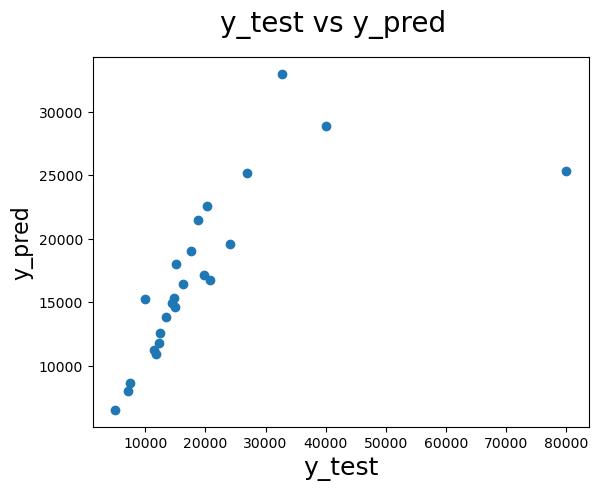

In [59]:
#run a final model using the optimal parameters
final_model = RandomForestRegressor(criterion= 'squared_error', n_estimators=100, max_features='sqrt', max_depth=10, min_samples_leaf=1, random_state=1)
run_experiment(final_model)

# Checking the value of interest

In [60]:
new_input = data.loc[94:94]
new_input

,tdweight,length,Cabin exterior width,eheight,interior height highest point,Usage Intent- On or Off Road,A/C,Roof Rack,Driver Side Window,Driver Side Door,...,Rear Door,Rear Door Window,Spare Tire,Battery Power Supply,Cabinets,Refrigerator,STOVE,USB Charging,Awning,price
94,850,144.0,93.0,72.0,47.0,2,2,2,0,0,...,2,2,1,0,1,1,1,2,1,9995


In [61]:
#drop the variable to be predicted
new_input=new_input.drop(['price', 'Roof Rack', 'Driver Side Window', 'Driver Side Door', 'Passenger Side Door', 'Passenger Side Window', 'Rear Door'],axis=1)
new_input

,tdweight,length,Cabin exterior width,eheight,interior height highest point,Usage Intent- On or Off Road,A/C,Driver Side Door Window,Passenger Side Door Window,Rear Door Window,Spare Tire,Battery Power Supply,Cabinets,Refrigerator,STOVE,USB Charging,Awning
94,850,144.0,93.0,72.0,47.0,2,2,3,3,2,1,0,1,1,1,2,1


In [62]:
new_input_scaled = scaler.fit_transform(new_input)

In [63]:
new_output = final_model.predict(new_input_scaled)
new_output

array([17140.17])

# Notes on the metrics used
✔️ Regression Evaluation Metrics
Here are three common evaluation metrics for regression problems:

Mean Absolute Error (MAE) is the mean of the absolute value of the errors:
1𝑛∑𝑖=1𝑛|𝑦𝑖−𝑦̂𝑖|
1
n
∑
i
=
1
n
|
y
i
−
y
^
i
|
 

 
Mean Squared Error (MSE) is the mean of the squared errors:
1𝑛∑𝑖=1𝑛(𝑦𝑖−𝑦̂𝑖)2
1
n
∑
i
=
1
n
(
y
i
−
y
^
i
)
2
 
Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:
1𝑛∑𝑖=1𝑛(𝑦𝑖−𝑦̂𝑖)2‾‾‾‾‾‾‾‾‾‾‾‾‾‾⎷
1
n
∑
i
=
1
n
(
y
i
−
y
^
i
)
2
 
📌 Comparing these metrics:

MAE is the easiest to understand, because it's the average error.
MSE is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units.
All of these are loss functions, because we want to minimize them.

https://www.kaggle.com/code/faressayah/practical-introduction-to-10-regression-algorithm?scriptVersionId=117768677&cellId=36

<iframe src="https://www.kaggle.com/embed/faressayah/practical-introduction-to-10-regression-algorithm?cellIds=36&kernelSessionId=117768677" height="300" style="margin: 0 auto; width: 100%; max-width: 950px;" frameborder="0" scrolling="auto" title="Practical Introduction to 10 Regression Algorithm"></iframe>